In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import plane_att_n_batchs

number of parameters: 0.000033 M 
step 0: train loss 0.1672, val loss 0.1531
step 1: train loss 0.1621, val loss 0.1538
step 2: train loss 0.1619, val loss 0.1584
step 3: train loss 0.1557, val loss 0.1475
step 4: train loss 0.1562, val loss 0.1516
step 5: train loss 0.1442, val loss 0.1378
step 6: train loss 0.1372, val loss 0.1323
step 7: train loss 0.1236, val loss 0.1181
step 8: train loss 0.1059, val loss 0.0973
step 9: train loss 0.0813, val loss 0.0784
step 10: train loss 0.0579, val loss 0.0543
step 11: train loss 0.0356, val loss 0.0367
step 12: train loss 0.0260, val loss 0.0235
step 13: train loss 0.0304, val loss 0.0317
step 14: train loss 0.0495, val loss 0.0407
step 15: train loss 0.0650, val loss 0.0632
step 16: train loss 0.0652, val loss 0.0578
step 17: train loss 0.0559, val loss 0.0532
step 18: train loss 0.0409, val loss 0.0423
step 19: train loss 0.0224, val loss 0.0246
step 20: train loss 0.0181, val loss 0.0218


In [3]:
# Plot the decision boundary
h = 0.02
x_min, x_max = plane_att_n_batchs.valset.x.min() - .05, plane_att_n_batchs.valset.x.max() + .05
y_min, y_max = plane_att_n_batchs.valset.y.min() - .05, plane_att_n_batchs.valset.y.max() + .05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
X.shape

torch.Size([364816, 2])

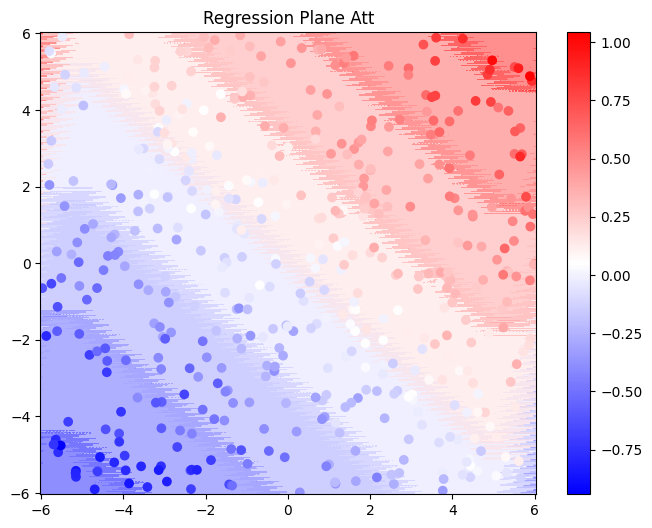

In [4]:
plane_att_n_batchs.model.eval()
# to run this my memory is not enough
# Z = plane_att_n_batchs.model(X)
batch_size = 64
Z = torch.zeros(X.shape[0], 1)
for i in range(0, X.shape[0], batch_size):
    end = min(i + batch_size, X.shape[0])
    batch_x = X[i:end]
    Z[i:end] = plane_att_n_batchs.model(batch_x)

Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z.detach().numpy(), cmap=plt.cm.bwr, alpha=0.5)
plt.scatter(plane_att_n_batchs.valset.x, plane_att_n_batchs.valset.y, c=plane_att_n_batchs.valset.label, cmap=plt.cm.bwr)
plt.title('Regression Plane Att')
plt.colorbar()
plt.show()


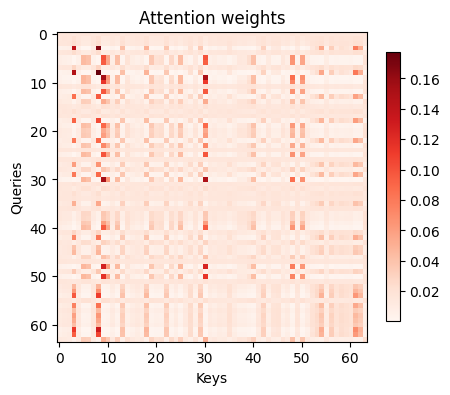

In [5]:
from torch.nn import functional as F
import math
from draw import show_attention
for x, y in plane_att_n_batchs.valloader:
    x = plane_att_n_batchs.model.embed(x)
    wei = x @ x.transpose(-2, -1) / math.sqrt(plane_att_n_batchs.n_embd)
    wei = F.softmax(wei, dim=-1)
    # print(wei.shape)
    show_attention(wei.detach().numpy())
    break

torch.Size([4, 16, 16])


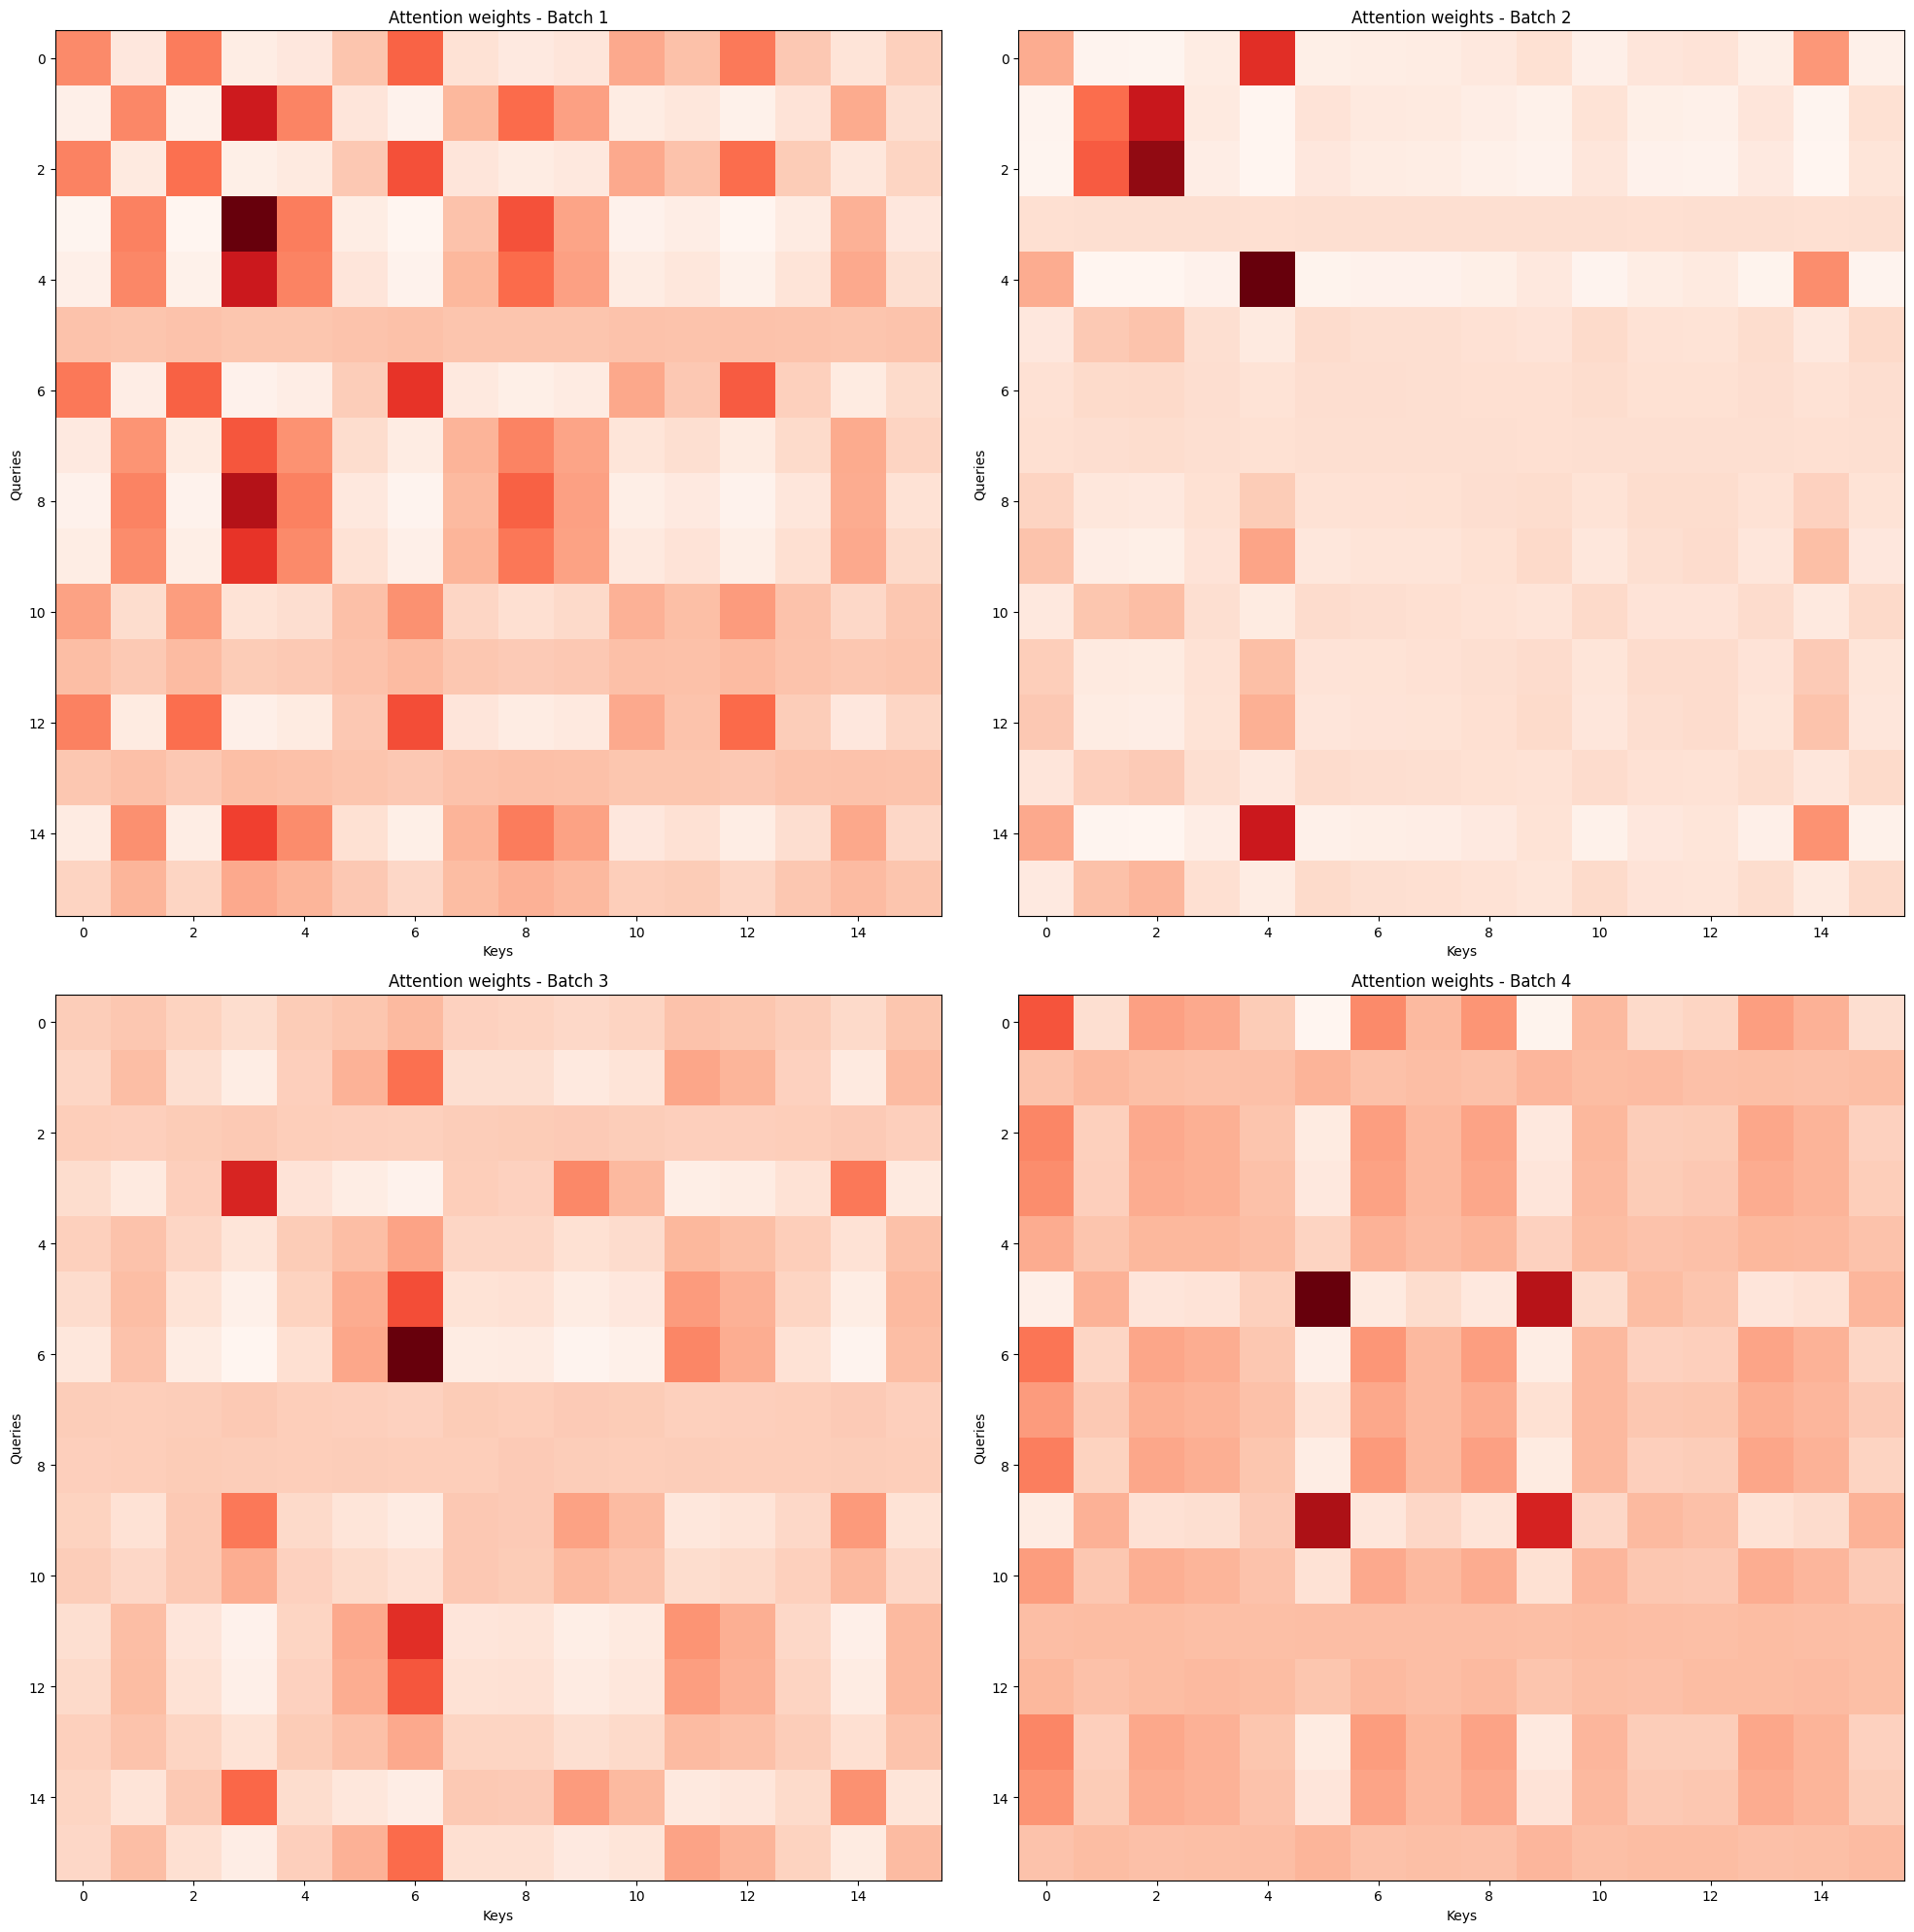

In [6]:
from draw import show_attention_batch
from einops import rearrange
for x, y in plane_att_n_batchs.valloader:
    x = plane_att_n_batchs.model.embed(x)
    x = rearrange(x, '(nB Bs) d -> Bs nB d', nB=plane_att_n_batchs.n_batchs)
    wei = x @ x.transpose(-2, -1) / math.sqrt(plane_att_n_batchs.n_embd)
    wei = F.softmax(wei, dim=-1)
    print(wei.shape)
    show_attention_batch(wei.detach().numpy(),figsize=(20,20))
    break